## Estadística Aplicada

Sesión 10 - 6 Septiembre

Paulina Quiroz Sánchez 1723927

Grupo 41

In [1]:
##librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [2]:
## Importar los datos

recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [3]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


Suponiendo que el tiempo de superviencia se distribuye exponencial.

In [4]:
exponen = ExponentialFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [5]:
exponen.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Función de riesgo de la exponencial')

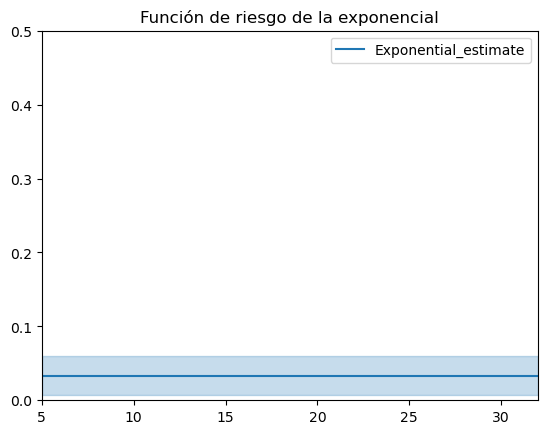

In [6]:
#Funcion de riesgo constante (exponencial)
exponen.plot_hazard()
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.title('Función de riesgo de la exponencial')

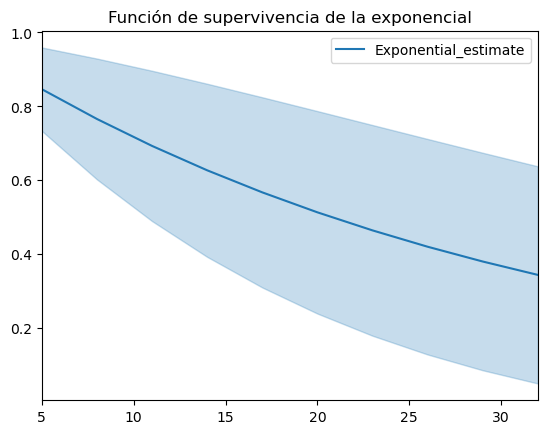

In [7]:
exponen.plot_survival_function()
plt.title('Función de supervivencia de la exponencial')
plt.xlim(5,32);

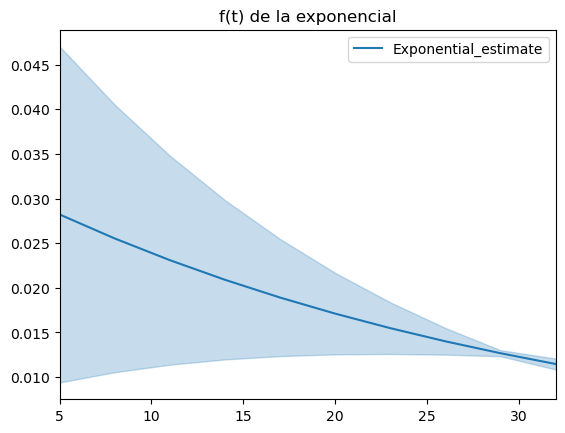

In [8]:
exponen.plot_density()
plt.title('f(t) de la exponencial')
plt.xlim(recaida[' tiempo'].min(),recaida[' tiempo'].max());

## Weibull
Suponiendo que el tiempo de supervivencia se distribuye Weibull

In [9]:
#El riesgo puede ser creciente, decreciente o constante
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [10]:
## gamma de la Weibull
mweibull.rho_

1.8867259500116444

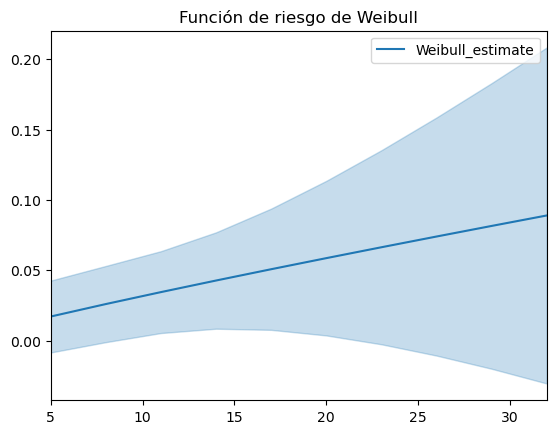

In [11]:
## h(t)
mweibull.plot_hazard()
plt.title('Función de riesgo de Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

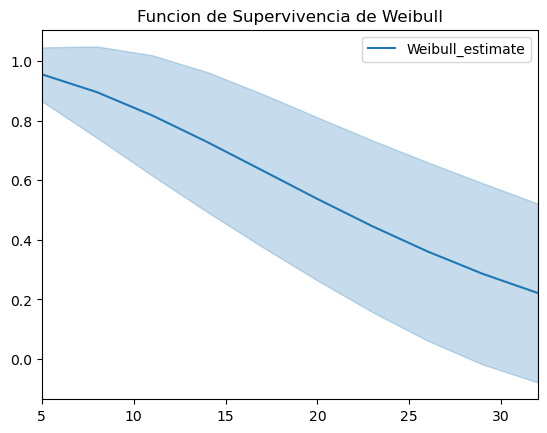

In [12]:
## S(t)
mweibull.plot_survival_function()
plt.title('Funcion de Supervivencia de Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

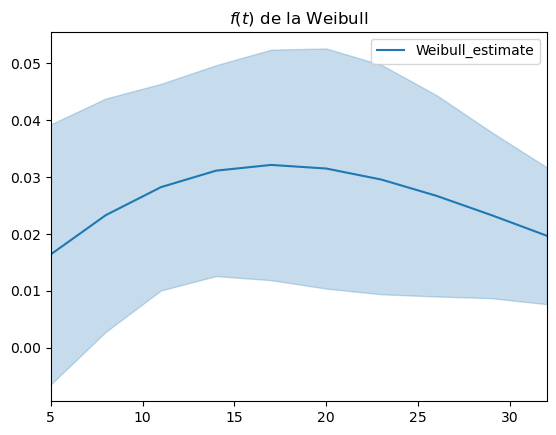

In [13]:
## f(t)
mweibull.plot_density()
plt.title('$f(t)$ de la Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

## Log Normal
Suponiendo que el tiempo de supervivencia se distribuye normal

El riesgo puede ser creciente y luego decreciente

In [14]:
mlogn = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

(5.0, 32.0)

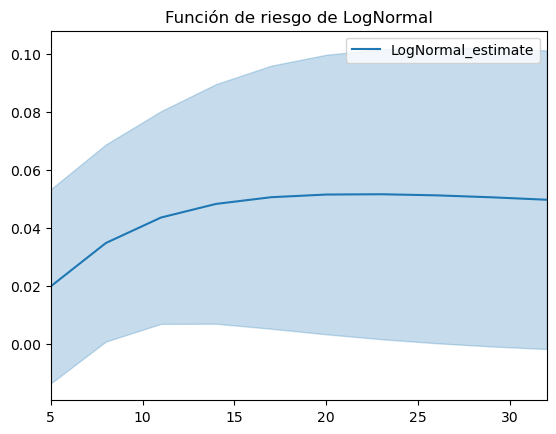

In [15]:
## riesgo h(t)
mlogn.plot_hazard()
plt.title('Función de riesgo de LogNormal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

In [16]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


**Sesión 11  - 7 septiembre**

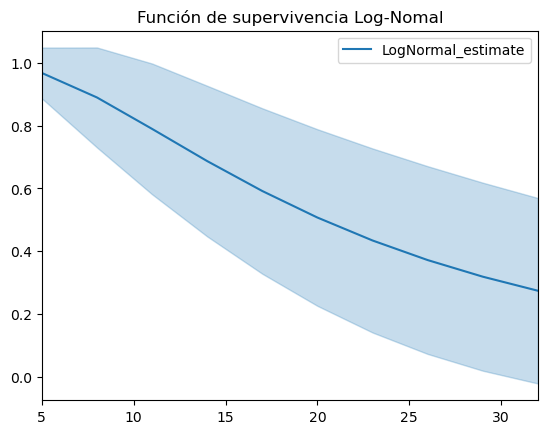

In [17]:
## función de supervivencia
mlogn.plot_survival_function()
plt.title('Función de supervivencia Log-Nomal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

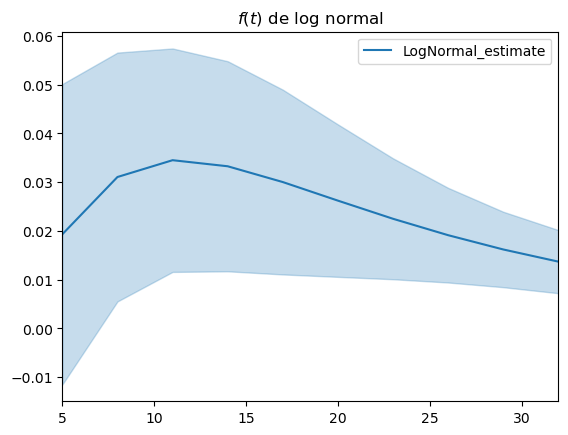

In [18]:
# f(t) log normal
mlogn.plot_density()
plt.title('$f(t)$ de log normal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

Tomamos una base de datos de tiempo de supervivencia, y supusimos que el tiempo de supervivencia se comportaba de forma:
1. Exponencial
2. Weibull
3. LogNormal


¿Cuál de estos tres modelos describe mejor el comportamiento de los datos?

**Para responder la pregunta usaremos el criterio de Akaike (AIC)**

$$AIC = -2ln(Verosimilitud) + 2k $$

k = número de parámetros en el modelo

De acuerdo con el criterio de Akaike (AIC), el "mejor" modelo es el que tiene menor AIC. El AIC elige modelos mas simples (no tienen muchos parametros)

In [24]:
print('AIC de tres modelos')
print('Exponencial:',exponen.AIC_.round(2), ' , Weibull:', mweibull.AIC_.round(2), ' , LogNormal:', mlogn.AIC_.round(2))

AIC de tres modelos
Exponencial: 54.81  , Weibull: 54.16  , LogNormal: 54.51


De acuerdo con el criterio de Akaike (AIC), el "mejor" modelo, es decir, el que mejor describe los datos de supervivencia de las recaidas es el modelo Weibull. Donde el tiempo de recaer es creciente a través del tiempo.